In [1]:
import numpy as np
import datetime
import matplotlib.pyplot as plt

from Options.optionsdata import OptionsData
from Options.blackScholes import*
from Options.callOption import CallOption
from Options.putOption import PutOption
from Options.asianOption import*


from Options.optionGreekPlotter3D import OptionGreekPlotter3D
from Options.optionGreekPlotter import OptionGreekPlotter

# European Call and Put pricing

In [2]:
Ticker ="AAPL"
today = datetime.date.today()

In [3]:
implied_vol = OptionsData(Ticker, extract_date = today)
implied_vol.load_data()
implied_vol.process_data(interest_rate=0.042)

Data loaded successfully!


d:\deb\ENSAI\cours3A\11. ASSET MANAGEMENT\LAB\Script\Options\blackScholes.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(stock / strike) + (interest_rate + 0.5 * sigma**2) * maturity) / (sigma * np.sqrt(maturity))
d:\deb\ENSAI\cours3A\11. ASSET MANAGEMENT\LAB\Script\Options\optionsdata.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_data['implied_volatility'] = call_data.apply(lambda row: implied_volatility(
d:\deb\ENSAI\cours3A\11. ASSET MANAGEMENT\LAB\Script\Options\blackScholes.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(stock / strike) + (interest_rate + 0.5 * sigma**2) * maturity) / (sigma * np.sqrt(maturity))
d:\deb\ENSAI\cours3A\11. ASSET MANAGEMENT\LAB\Scrip

In [4]:
options_df_filtered = implied_vol.implied_volatility

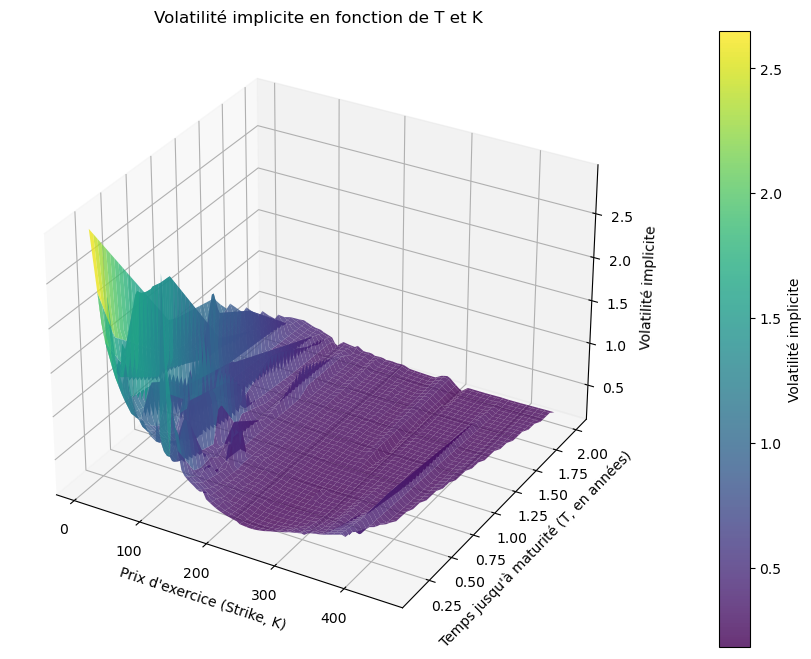

In [5]:
implied_vol.implied_volatility_plot()

In [6]:
interest_rate = 0.042
T = 1.5
K = 190

#~Estimating the implied vol and getting the actual stock price
sigma, stock = implied_vol.sigma_sim(T, K)

# Instantiating European call and put options
call_option = CallOption(190, 1.5, stock, interest_rate, sigma)
put_option = PutOption(190, 1.5, stock, interest_rate, sigma)

# Pricing a european call
call_option.option_price()
call_option.price

59.232891620982315

In [7]:
# Example of usage
if __name__ == "__main__":
    # Define option parameters
    K = 200
    T = 1.5
    sigma, stock = implied_vol.sigma_sim(T, K)
    interest_rate = 0.042

    # Create the plotter instance
    plotter = OptionGreekPlotter(K, T, stock, sigma, interest_rate)

    # Functions for each Greek
    def delta(option):
        return option.delta()

    def gamma(option):
        return option.gamma()

    def theta(option):
        return option.theta()

    def vega(option):
        return option.vega()

    def rho(option):
        return option.rho()

    # Plot Delta vs Strikes
    strikes = np.linspace(0, 350, 1000)
    plotter.plot_greek(delta, strikes, "Strike", "Delta", "Delta for Call and Put Options")

    # Plot Gamma vs Strikes
    plotter.plot_greek(gamma, strikes, "Strike", "Gamma", "Gamma for Call and Put Options")

    # Plot Theta vs Maturities
    maturities = np.linspace(0.1, 5, 100)
    plotter.plot_greek(theta, maturities, "Maturity (T)", "Theta", "Theta for Call and Put Options")

    # Plot Vega vs Strikes
    plotter.plot_greek(vega, strikes, "Strike", "Vega", "Vega for Call and Put Options")

    # Plot Rho vs Strikes
    plotter.plot_greek(rho, strikes, "Strike", "Rho", "Rho for Call and Put Options")

d:\deb\ENSAI\cours3A\11. ASSET MANAGEMENT\LAB\Script\Options\callOption.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(self.stock / self.strike) + (self.interest_rate + 0.5 * self.sigma**2) * self.maturity) / (self.sigma * np.sqrt(self.maturity))
d:\deb\ENSAI\cours3A\11. ASSET MANAGEMENT\LAB\Script\Options\putOption.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(self.stock / self.strike) + (self.interest_rate + 0.5 * self.sigma**2) * self.maturity) / (self.sigma * np.sqrt(self.maturity))


d:\deb\ENSAI\cours3A\11. ASSET MANAGEMENT\LAB\Script\Options\option.py:17: RuntimeWarning:

divide by zero encountered in scalar divide



d:\deb\ENSAI\cours3A\11. ASSET MANAGEMENT\LAB\Script\Options\option.py:22: RuntimeWarning:

divide by zero encountered in scalar divide



d:\deb\ENSAI\cours3A\11. ASSET MANAGEMENT\LAB\Script\Options\callOption.py:29: RuntimeWarning:

divide by zero encountered in scalar divide

d:\deb\ENSAI\cours3A\11. ASSET MANAGEMENT\LAB\Script\Options\putOption.py:29: RuntimeWarning:

divide by zero encountered in scalar divide



In [8]:


# Example Usage
if __name__ == "__main__":
    # Define option parameters
    stock = 100
    sigma = 0.2
    interest_rate = 0.05

    # Define range for strikes and maturities
    strikes = np.linspace(50, 150, 50)
    maturities = np.linspace(0.1, 2, 50)

    # Create the plotter instance
    plotter = OptionGreekPlotter3D(stock, sigma, interest_rate, type_option="call")

    # Functions for each Greek
    def delta(option):
        return option.delta()

    def gamma(option):
        return option.gamma()

    def theta(option):
        return option.theta()

    def vega(option):
        return option.vega()

    def rho(option):
        return option.rho()

    # Plot Delta with dynamic slicing
    plotter.plot_greeks(delta, strikes, maturities, "Delta")


# Asian Call and Put pricing

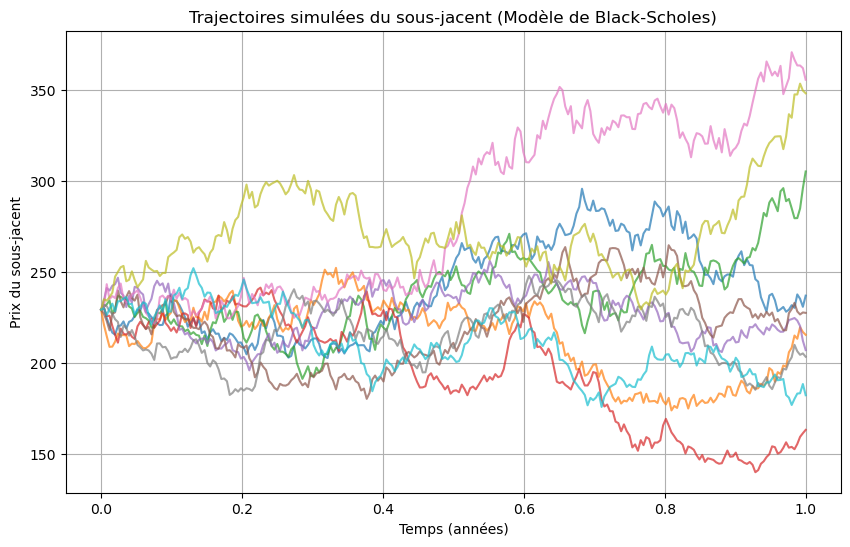

(52.2803847289918, 0.718397138976818)

In [9]:
K = 180
T = 1
r = 0.042
sigma, S= implied_vol.sigma_sim(T, K)

# Paramètres de simulation
n_simulations = 10000
n_steps = 252

asianOption = AsianOption()
asianOption.price_asian_option(S, K, T, r, sigma, n_simulations, n_steps)

# US Bond Pricing

In [9]:
#%pip install fredapi
#%pip install nelson_siegel_svensson
#%pip install datetime

In [20]:
from BondSwap.bond import*
from BondSwap.riskFree import*
from BondSwap.swap import*
import datetime

In [21]:
api_key = '99b15e0a2f3b3f4571893e831fd555d0'

# French Zero-coupon rate
taux_zc_fr = RiskFree()
taux_zc_fr.get_country('fr')
taux_zc_fr.get_riskFree_fr()

# US Zero-coupon rate
taux_zc_usa = RiskFree()
taux_zc_usa.get_country('usa')
taux_zc_usa.get_riskFree_usa(api_key)

In [23]:
taux_zc_usa.riskFree_usa

,maturity,taux_zc
0,1,0.043114
1,2,0.043542
2,3,0.043862
3,4,0.044246
4,5,0.044742
5,6,0.045345
6,7,0.046034
7,8,0.046787
8,9,0.047581
9,10,0.048399


In [12]:
bond_fr = Bond()
bond_fr.get_country('fr')
bond_fr.get_riskFree_rate(riskFree=taux_zc_fr)


bond_usa = Bond()
bond_usa.get_country('usa')
bond_usa.get_riskFree_rate(riskFree=taux_zc_usa)

In [13]:
bond_fr.get_price(face_value=1000, coupon_rate=.0, maturity=2, freq=1)

942.0979496881404

In [14]:
swap_fr = Swap()
swap_fr.get_country('fr')
swap_fr.get_riskFree_rate(riskFree=taux_zc_fr)

swap_usa = Swap()
swap_usa.get_country('usa')
swap_usa.get_riskFree_rate(riskFree=taux_zc_usa)

In [15]:
bond_fr.get_price(face_value=1000, coupon_rate=.0, maturity=2, freq=2)
print(f"French Gov Bond: {bond_fr.price:,.2f} euros") # assuming a notional in euros

French Gov Bond: 942.91 euros


In [16]:
bond_usa.get_price(face_value=1000, coupon_rate=.0, maturity=2, freq=2)
# Calculate the swap value
print(f"Treasury bond: ${bond_usa.price:,.2f}") # assuming a notional in dollars

Treasury bond: $919.89


# Swap

In [17]:
# Example data
t = 0  # Current time
T = np.array([1, 2, 3, 4, 5])  # Payment times in years
N = 1000000  # Notional amount
K = 0.02  # Fixed swap rate (4%)

# Calculate the swap value
swap_usa.swap(t, T, N, K)
swap_fr.swap(t, T, N, K)

print(f"Swap Value on USA risk free rate: ${swap_usa.swap_value:,.2f}") # assuming a notional in dollars
print(f"Swap Value on French risk free rate: {swap_fr.swap_value:,.2f} euros") # assuming a notional in euros


Swap Value on USA risk free rate: $112,684.10
Swap Value on French risk free rate: 1,524.43 euros


In [18]:
time = np.arange(365) / 365
s = np.array([swap_usa.swap(t, T, N, K) for t in time])

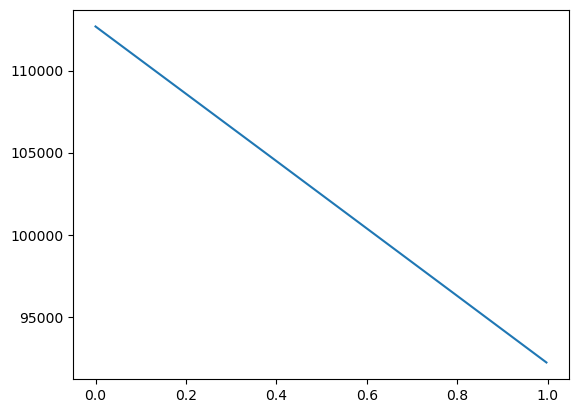

In [19]:
plt.plot(time, s)

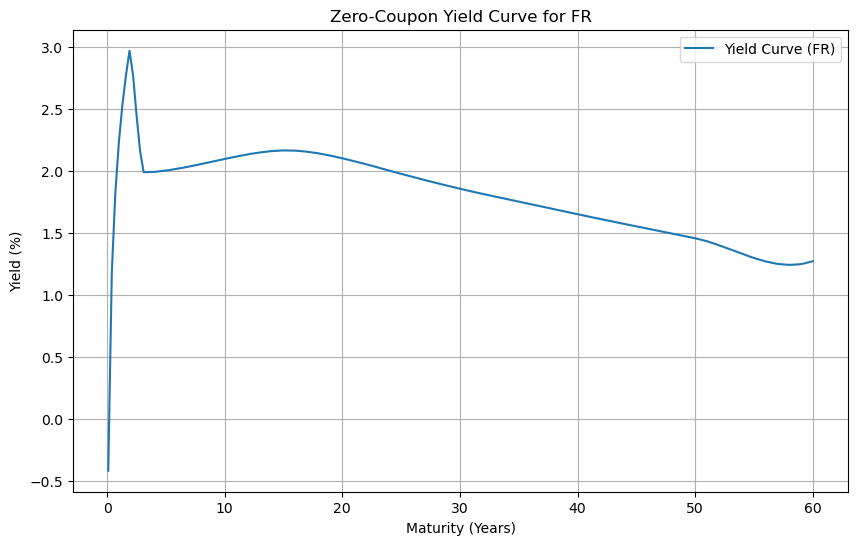

In [20]:
taux_zc_fr.yield_curve_plot()


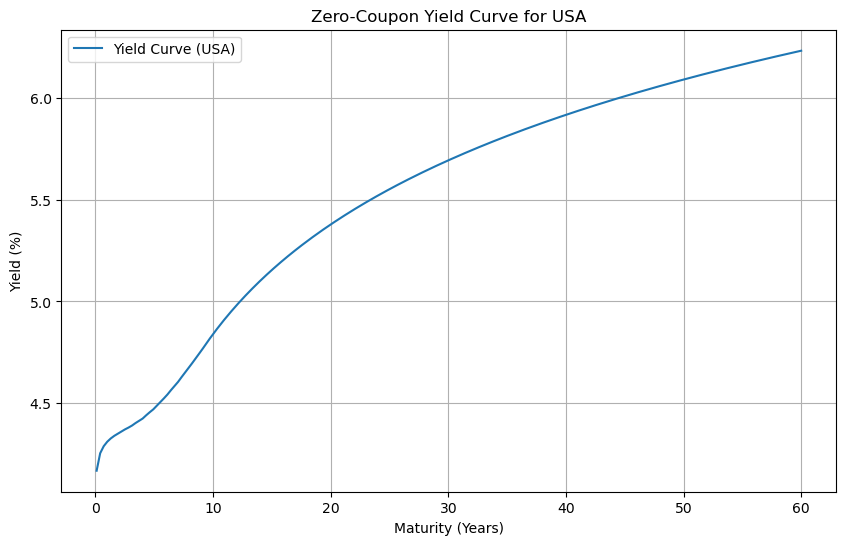

In [21]:
taux_zc_usa.yield_curve_plot()

In [22]:
import plotly.graph_objects as go
import numpy as np

def plot_bond_price():
    face_value = 1000  # Fixed face value
    freq = 0.5  # Semi-annual payments
    coupon_rates = np.linspace(0, 0.1, 50)  # Coupon rates from 0% to 10%
    maturities = np.linspace(1, 30, 50)  # Maturities from 1 to 30 years

    # Create a grid of coupon rates and maturities
    X, Y = np.meshgrid(coupon_rates, maturities)
    Z = np.zeros_like(X)

    # Initialize a Bond object
    bond = Bond()
    bond.get_country("usa")
    bond.get_riskFree_rate(taux_zc_usa)  # Assume you have initialized the riskFree object

    # Calculate bond prices
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = bond.get_price(face_value, X[i, j], Y[i, j], freq=freq)

    # Create the 3D surface plot
    fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale="Viridis")])
    fig.update_layout(
        title="Bond Price vs. Coupon Rate and Maturity",
        scene=dict(
            xaxis_title="Coupon Rate",
            yaxis_title="Maturity (Years)",
            zaxis_title="Bond Price",
        ),
    )
    fig.show()

# Call the function
plot_bond_price()
